In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

#%matplotlib notebook

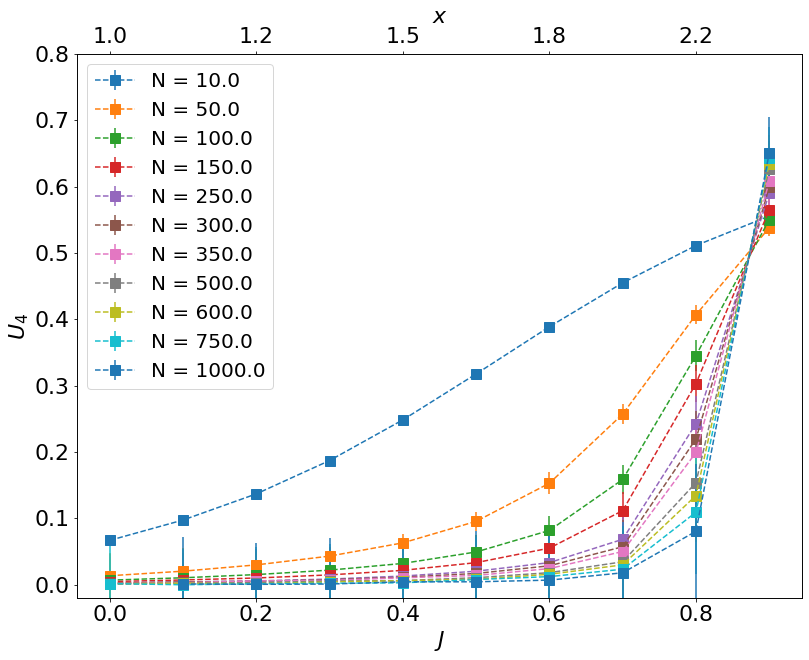

In [2]:
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical.png")

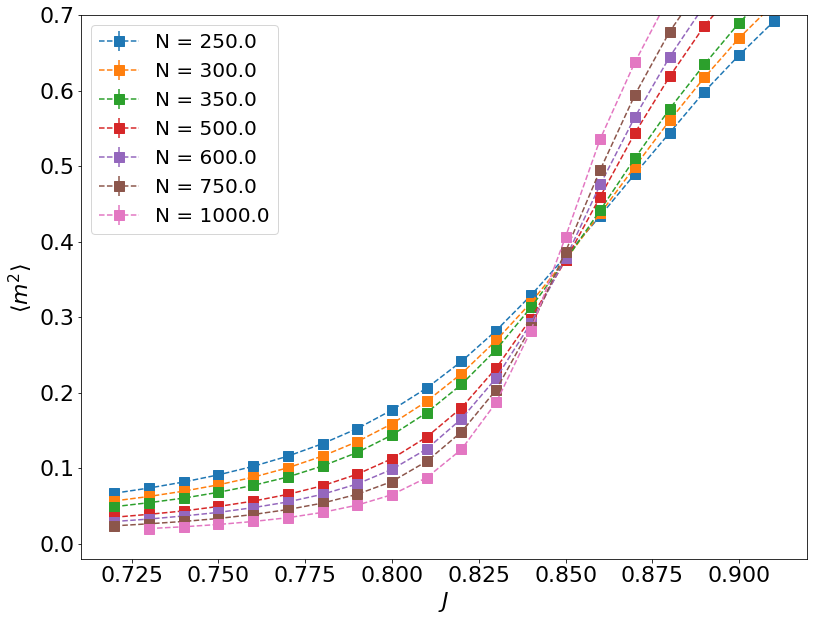

In [3]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if (l<250):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = data_l[:,15]
    errs = data_l[:,16]
    #errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    #errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)
 
#ax2 = ax.twiny() 
#ax2.set_xlabel(r'$x$', fontsize=22)
#ax2.set_xticks(np.arange(0,11,2)/10)
#ax2.tick_params(axis='x', labelsize=22)
#ax2.set_xbound(ax.get_xbound())
#ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/mag2.png")


plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/mag2.png")

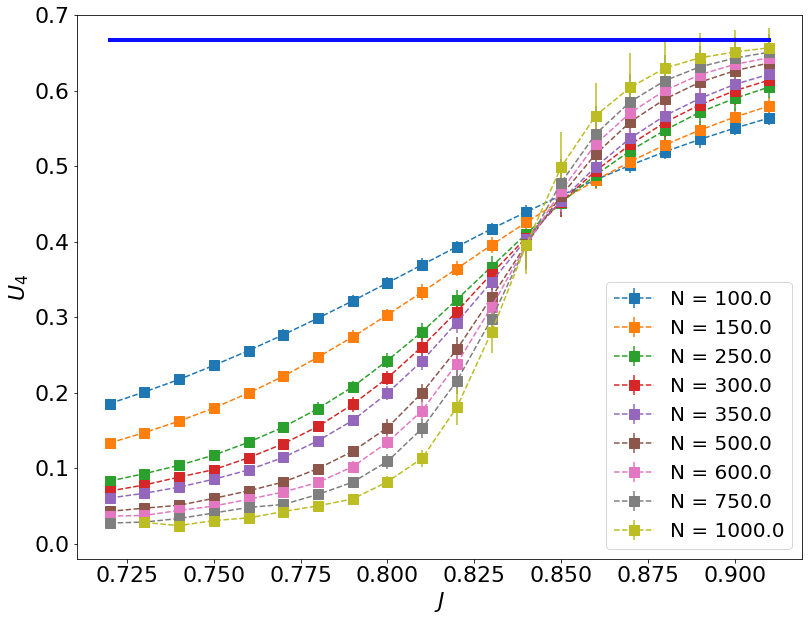

In [4]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if (l<100):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-",  c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)
 
#ax2 = ax.twiny() 
#ax2.set_xlabel(r'$x$', fontsize=22)
#ax2.set_xticks(np.arange(0,11,2)/10)
#ax2.tick_params(axis='x', labelsize=22)
#ax2.set_xbound(ax.get_xbound())
#ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical_deeper.png")


plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/bcfar_canonical_deeper.png")

(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(19,)


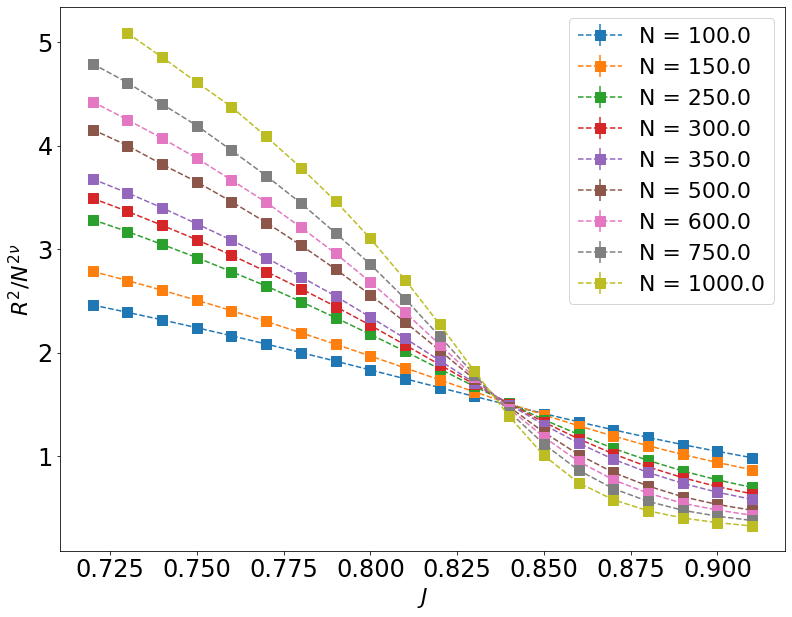

In [5]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

for l in lengths:
    if (l<100):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
    print(bc.shape, )
    
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.ylim(-0.02, 0.8)


plt.legend(fontsize=22)

#plt.grid()

plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")

plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/rscaling.png")

(13,)
(13,)
(13,)


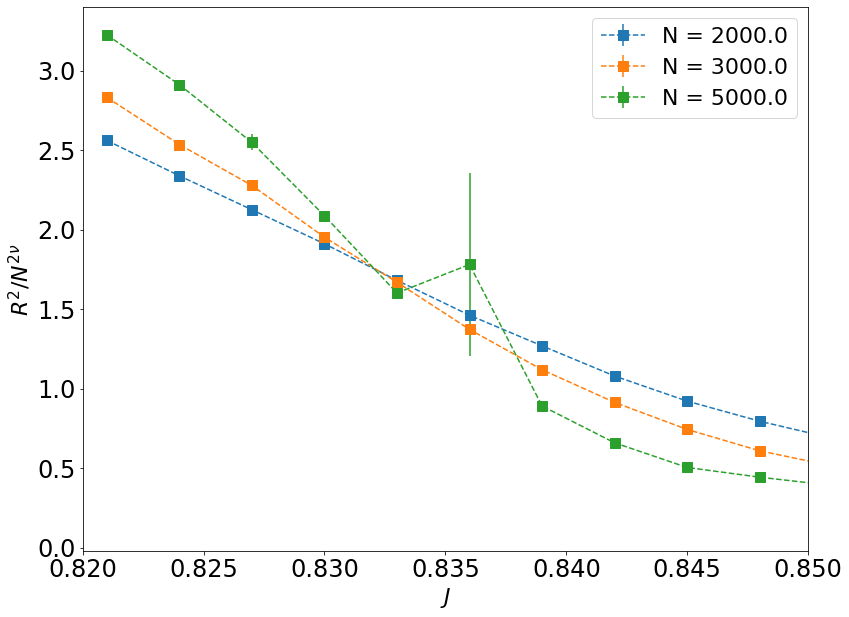

In [6]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

for l in lengths:
    if (l<100):
        continue
        
    if (l>5000):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
    print(bc.shape, )
    
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
plt.ylim(-0.02, 3.4)
plt.xlim(0.82, 0.85)

plt.legend(fontsize=22)

#plt.grid()

plt.savefig("/home/kamilla/Lattice_models/img/rscalinglong.png")

In [7]:
bc

array([3.22586259, 2.91247196, 2.5490246 , 2.0877208 , 1.6016789 ,
       1.78143881, 0.89099783, 0.65940995, 0.50432534, 0.44310449,
       0.39093116, 0.3497875 , 8.40858171])

In [8]:
def r_on_n(n, nu, b):
    
    
    return 2*nu*n+b

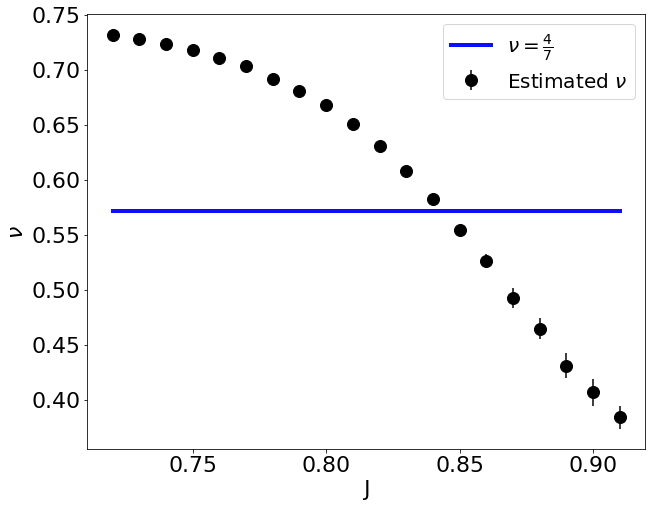

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,4] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
    

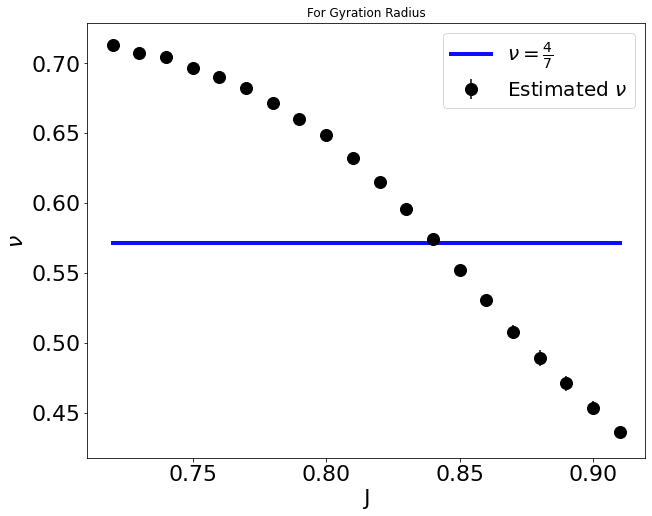

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,5]
    err_r = data_l[:,6] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)
plt.title("For Gyration Radius")
plt.legend(loc="best", fontsize=20)
    

[Text(0.0, 1, '1.0'),
 Text(0.2, 1, '1.2'),
 Text(0.4, 1, '1.5'),
 Text(0.6, 1, '1.8'),
 Text(0.8, 1, '2.2'),
 Text(1.0, 1, '2.7')]

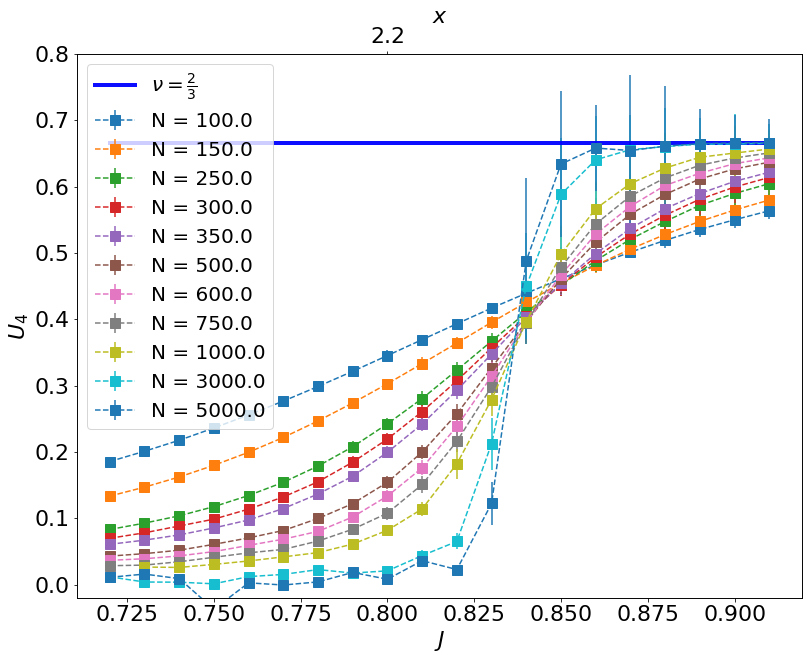

In [11]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
  
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )



-0.026923076923076925


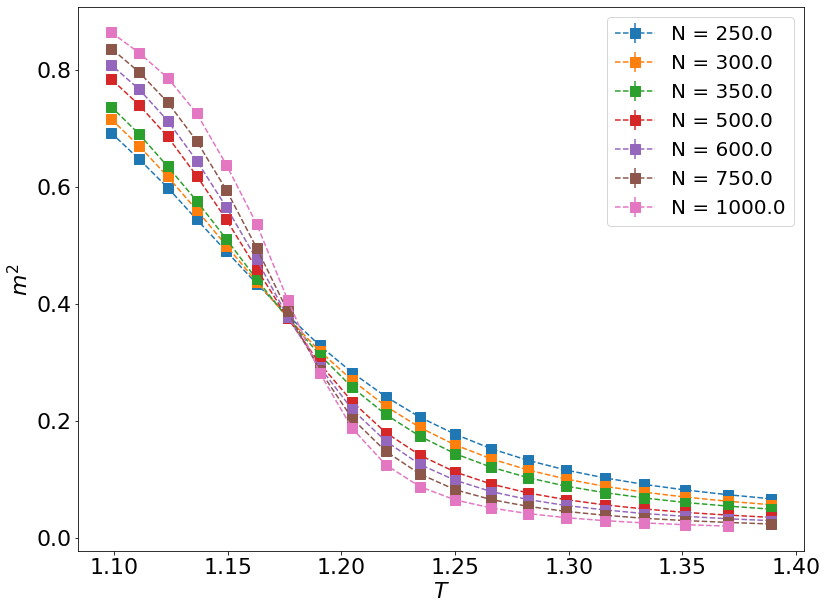

In [12]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = 1/data_l[:, 1]
    
    m2 = data_l[:,15] 
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l  , y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ m^2  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 

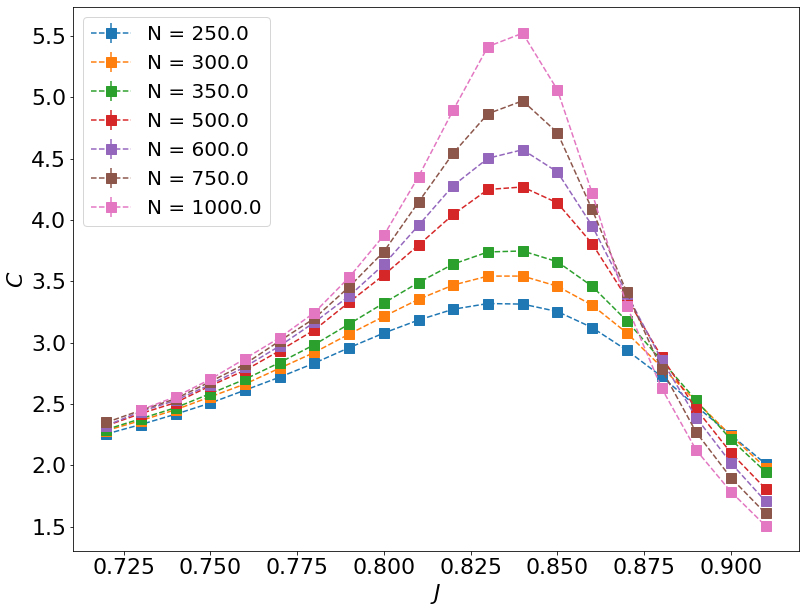

In [13]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
 
lengths = np.unique(data_np[:, 0])

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
for l in lengths:
    if (l<250):
        continue
     
    data_l = data_np[data_np[:,0]==l]
    
    J_l = data_l[:, 1]
    

    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*l
    

    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 
    
Tc = 1/0.835
 
 
gamma = 9/3.5
nu= 3.5
power = -gamma/nu

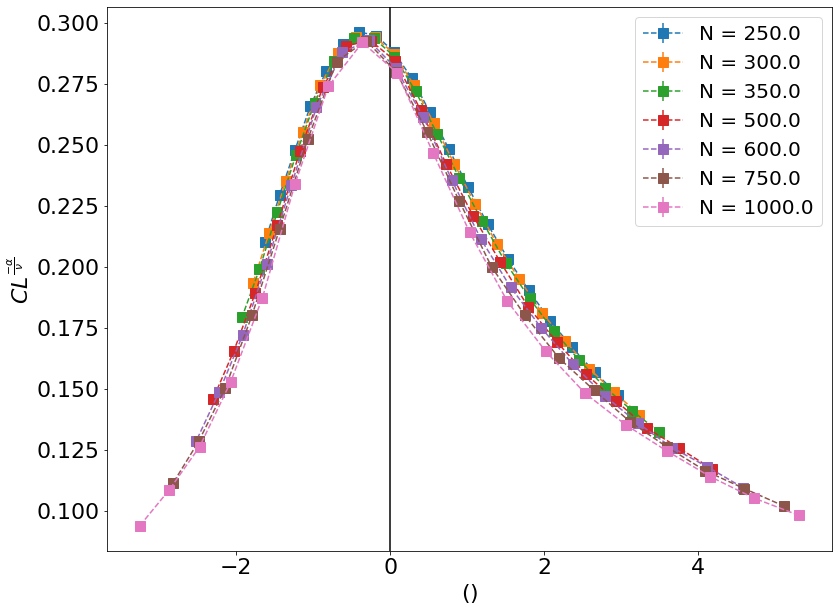

In [14]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.833
 
Tc = 1/0.832
 
gamma = -1/3
nu=2
power = -gamma/nu

gamma = 32/22 #4/3
nu = 2
power = -gamma/nu
 
nu=1

 
alpha = -1/3 
fc = 3/7
power = alpha*fc
#nu=1/fc
#power = 32/44/2 fine
power = -3/4
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = 1/data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(1/J_l) *l
    
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*np.power(L, power)
    
    
    #errs = data_l[:,16]*y
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    errs = errs*np.power(L, power)

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(x*np.power(L, 1/nu), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$ () $', fontsize = 22)
plt.ylabel(r"$ C L ^{\frac{-\alpha}{\nu}}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 
    

#plt.savefig("/home/kamilla/Lattice_models/img/canonical_cscaled.png")


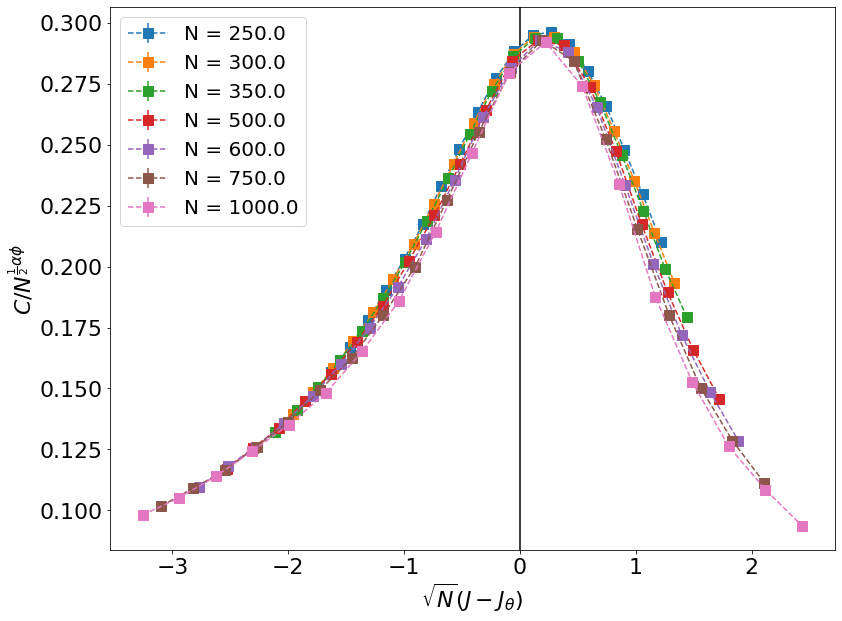

In [15]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.833
 
Tc = 0.833


gamma = -1/3
nu=2
power = -gamma/nu

gamma = 32/22 #4/3
nu = 2
power = -gamma/nu
 
nu=1

 
alpha = -1/3 
fc = 3/7
power = alpha*fc
#nu=1/fc
#power = -32/44


power = -3/4

for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*l*J_l*J_l
    
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*np.power(L, power)
    
    
    #errs = data_l[:,16]*y
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    errs = errs*np.power(L, power)

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(x*np.power(L, 1/nu), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.ylabel(r"$ C / N ^{\frac{1}{2} \alpha \phi}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 
    

plt.savefig("/home/kamilla/Lattice_models/img/canonical_cscaled.png")


-1.75


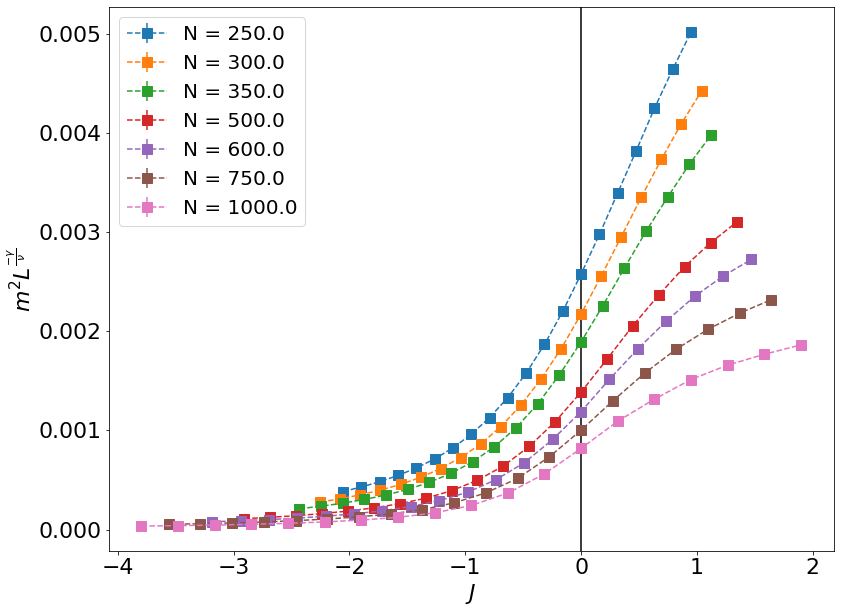

In [16]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1/0.865
Tc = 0.85
gamma = 7/4 # 7/4
nu = 45 #55  #7/1.5


nu = 1
power = -gamma/nu


print(power)
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    m2 = data_l[:,15]*J_l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*np.power(L, power)
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(x*np.power(L, 1/nu), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ m^2 L ^{\frac{-\gamma}{\nu}}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 


## Не работает фиттирование 

In [17]:
def r_in_theta_point(N, epsb_theta, a, b,fi ):
    epsb = 0.84

    r_sq = a*np.power(N, 8.0/7.0) + b*np.power(N, fi) * (epsb-epsb_theta)
    #r_sq = a*np.power(N,  nu) + b*np.power(N, fi) * (epsb-epsb_theta)
    return r_sq



In [18]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
#fig = plt.figure(figsize=(13, 10))
#ax = fig.add_subplot(111)

data_l = data_np[data_np[:,1]==0.84]
data_l = data_l[data_l[:,0]> 99]
#data_l = data_l[data_l[:,0]<699]
n_saw = data_l[:, 0] #np.sqrt(data_l[:, 0])
mean_r = data_l[:,5]
err_r = data_l[:,6] 



In [19]:

#popt, pcov = curve_fit( r_in_theta_point, n_saw, mean_r, sigma=err_r, p0=[0.847, 1, 1, 11.0/7.0], absolute_sigma= False, maxfev=5000 )  


In [20]:
#print(popt[0], np.sqrt(np.diag(pcov))[0])
#print(popt[-1], np.sqrt(np.diag(pcov))[-1])
#print(popt[-2], np.sqrt(np.diag(pcov))[-1])
#theta = popt[0]
#print(theta)

Text(0.5, 1.0, '$\\langle R^2 \\rangle $')

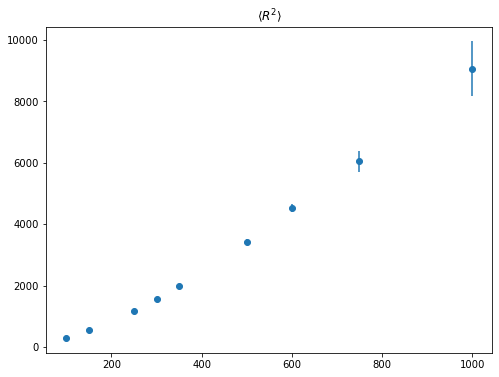

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

plt.errorbar(n_saw, mean_r, yerr=err_r, fmt = "o")

plt.title(r"$\langle R^2 \rangle $")

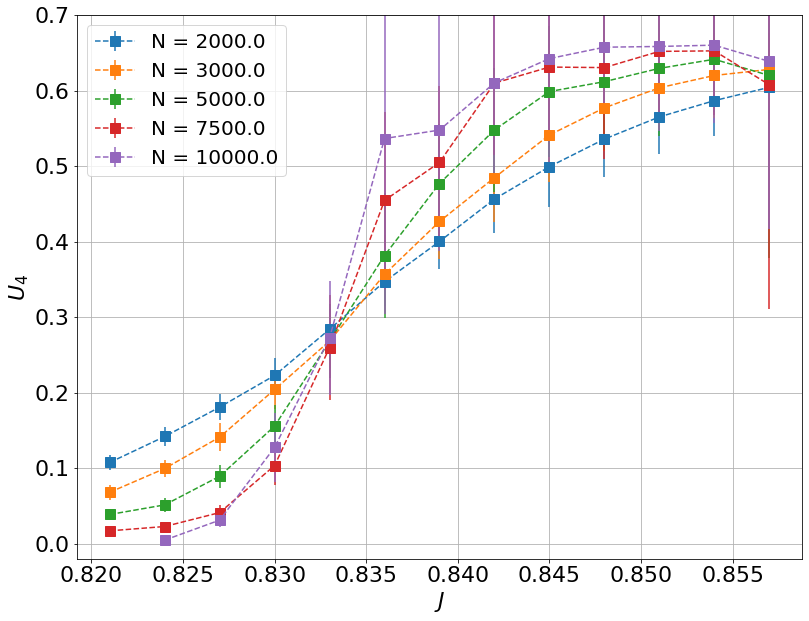

In [22]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if (l<100):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)


plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical_deeperlong.png")

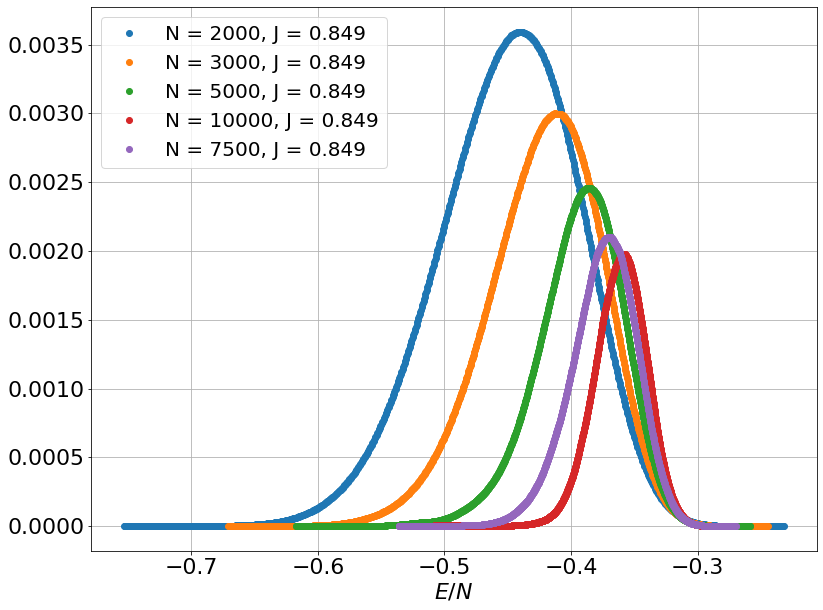

In [23]:
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_2000.txt", skiprows=2)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
    
plt.plot(data_np[:, 0]/2000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 2000, J = 0.849")
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_3000.txt", skiprows=2)
plt.plot(data_np[:, 0]/3000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 3000, J = 0.849")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 5000, J = 0.849")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_10000.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 10000, J = 0.849")




data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_7500.txt", skiprows=2)
plt.plot(data_np[:, 0]/7500, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 7500, J = 0.849")


plt.xlabel(r'$ E/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)

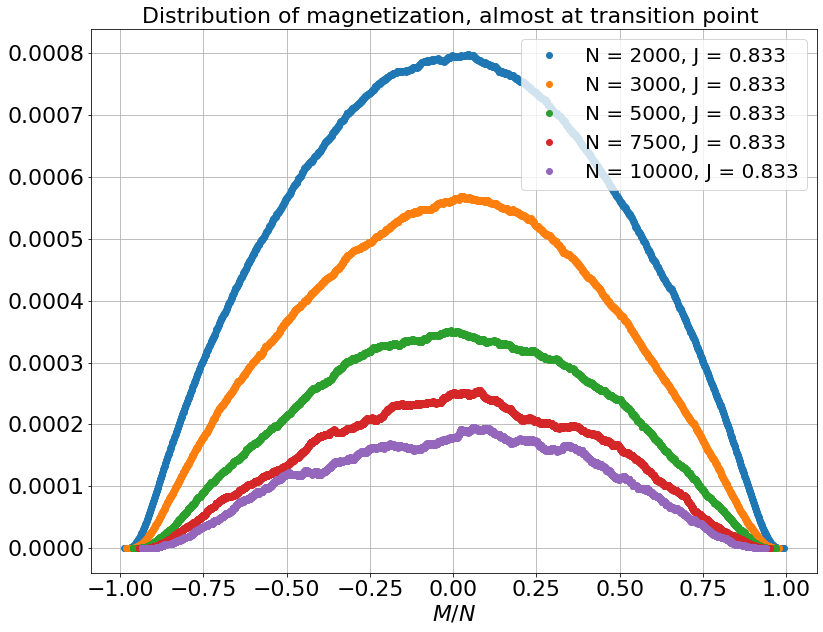

In [24]:
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_2000.txt", skiprows=2)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
    
plt.plot(data_np[:, 0]/2000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 2000, J = 0.833")
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_3000.txt", skiprows=2)
plt.plot(data_np[:, 0]/3000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 3000, J = 0.833")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 5000, J = 0.833")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_7500.txt", skiprows=2)
plt.plot(data_np[:, 0]/7500, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 7500, J = 0.833")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_10000.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 10000, J = 0.833")



plt.xlabel(r'$ M/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.title("Distribution of magnetization, almost at transition point ", fontsize=22)

plt.legend(loc="best", fontsize=20)

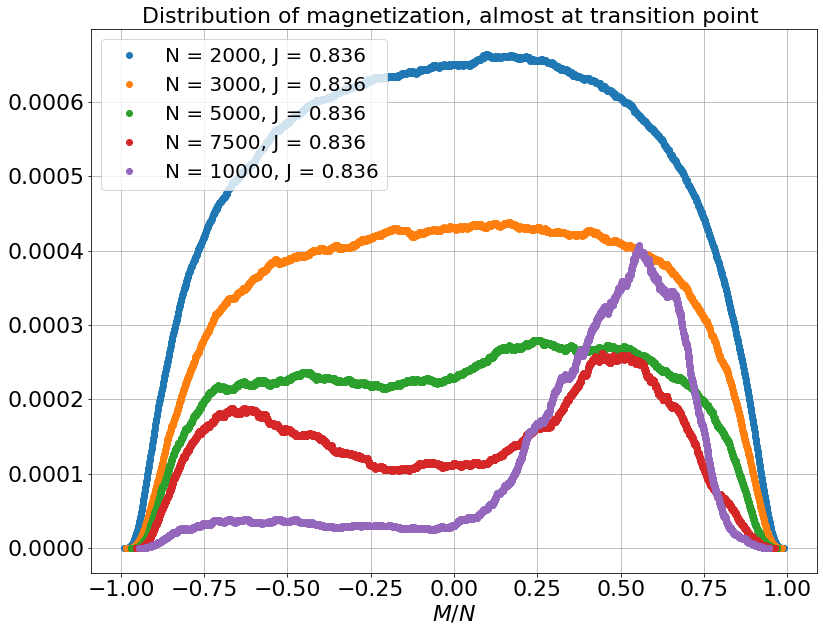

In [25]:
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_2000.txt", skiprows=2)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
    
plt.plot(data_np[:, 0]/2000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 2000, J = 0.836")
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_3000.txt", skiprows=2)
plt.plot(data_np[:, 0]/3000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 3000, J = 0.836")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 5000, J = 0.836")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_7500.txt", skiprows=2)
plt.plot(data_np[:, 0]/7500, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 7500, J = 0.836")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.836000_10000.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 10000, J = 0.836")



plt.xlabel(r'$ M/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.title("Distribution of magnetization, almost at transition point ", fontsize=22)

plt.legend(loc="best", fontsize=20)

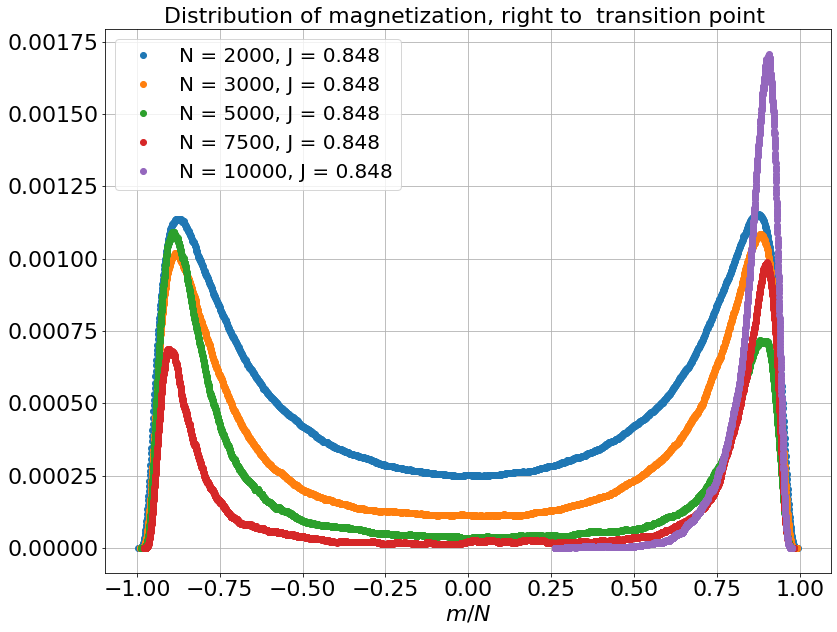

In [26]:
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_2000.txt", skiprows=2)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
    
plt.plot(data_np[:, 0]/2000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 2000, J = 0.848")
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_3000.txt", skiprows=2)
plt.plot(data_np[:, 0]/3000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 3000, J = 0.848")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 5000, J = 0.848")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_7500.txt", skiprows=2)
plt.plot(data_np[:, 0]/7500, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 7500, J = 0.848")


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_10000.txt", skiprows=2)
plt.plot(data_np[:, 0]/10000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"N = 10000, J = 0.848")





plt.title("Distribution of magnetization, right to  transition point ", fontsize=22)

plt.xlabel(r'$ m/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)

#  N = 2000

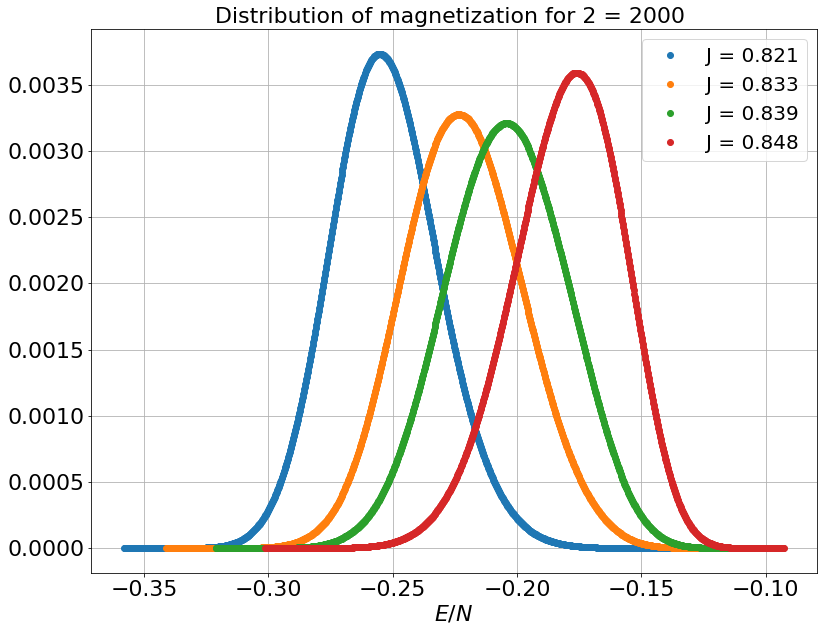

In [27]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.821000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.821")
 

data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.833000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.833")
 


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.839000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.839")
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_E_Ising_0.848000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.848")
 

 
plt.title("Distribution of magnetization for 2 = 2000 ", fontsize=22)

plt.xlabel(r'$ E/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)


plt.savefig("/home/kamilla/Lattice_models/img/distrenergy2000.png")

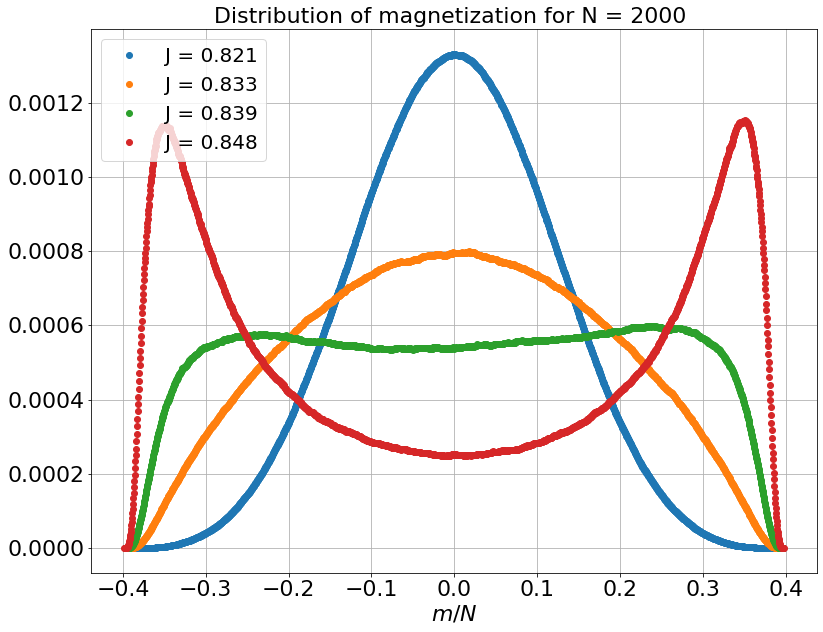

In [28]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.821000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.821")
 

data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.833")
 


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.839000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.839")
 
    
data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_2000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"J = 0.848")
 

 
plt.title("Distribution of magnetization for N = 2000 ", fontsize=22)

plt.xlabel(r'$ m/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)


plt.savefig("/home/kamilla/Lattice_models/img/distrmag2000.png")

# N = 5000

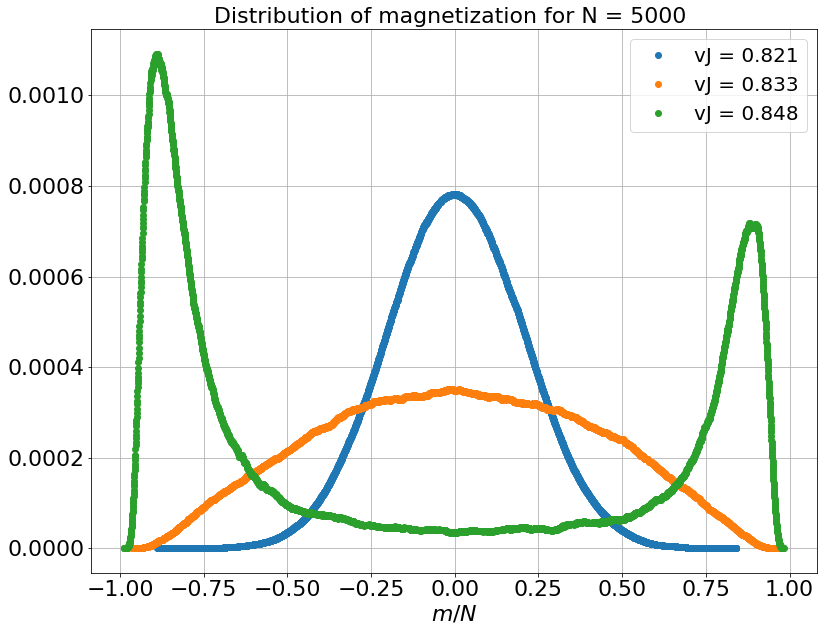

In [29]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.821000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"vJ = 0.821")
 

data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.833000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"vJ = 0.833")
 


data_np = np.loadtxt("Ising/Canonical_near_phase/Counts_M_Ising_0.848000_5000.txt", skiprows=2)
plt.plot(data_np[:, 0]/5000, data_np[:,1]/np.sum( data_np[:,1]) , "o", label = r"vJ = 0.848")
 

 
plt.title("Distribution of magnetization for N = 5000 ", fontsize=22)

plt.xlabel(r'$ m/N$', fontsize = 22)
#plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)

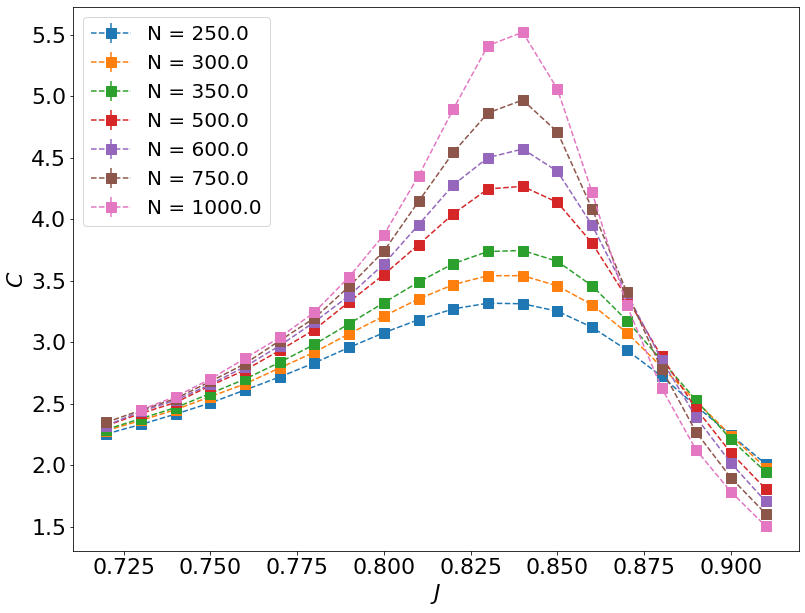

In [30]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.835
 
 
gamma = 9/3.5
nu= 3.5
power = -gamma/nu

 

 
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*l  #*J_l*J_l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    #errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs*l, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 
    

plt.savefig("/home/kamilla/Lattice_models/img/canonical_c.png")


plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/canonical_c.png")

In [31]:
power

-0.7346938775510204

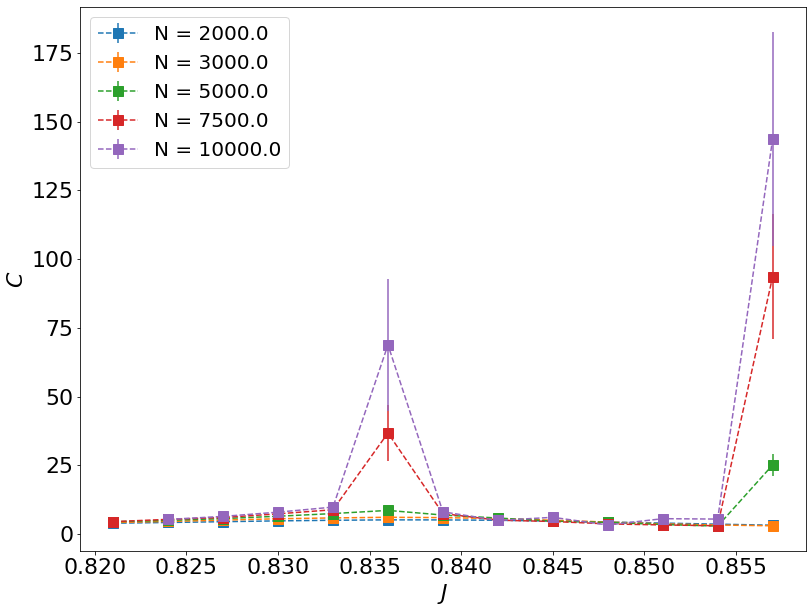

In [32]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.835
 
 
gamma = 9/3.5
nu= 3.5
power = -gamma/nu


 
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    #errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs*np.square(J_l)*l, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)



[  10.   50.  100.  150.  250.  300.  350.  500.  600.  750. 1000.]
-0.026923076923076925


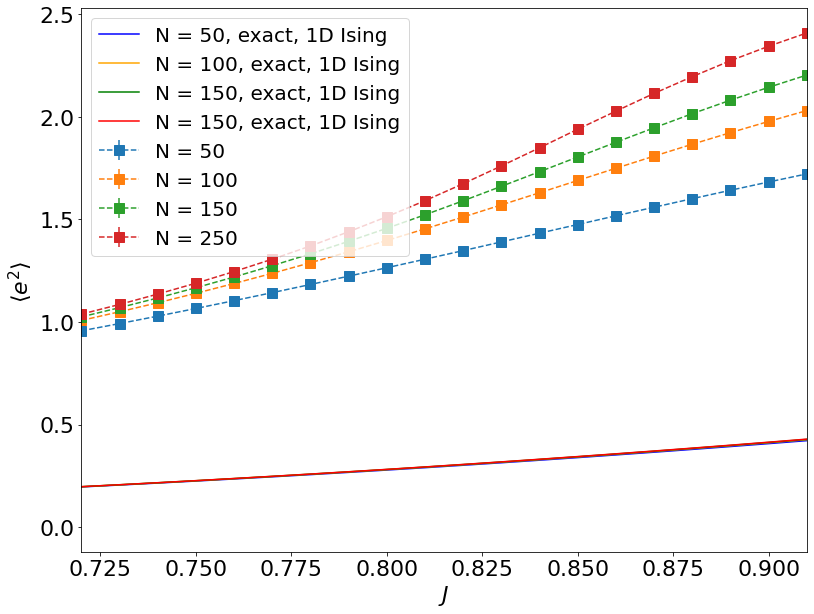

In [33]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
print(lengths)
Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)

lengths = [50, 100,150,250]
for l in lengths:
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l =  data_l[:,1] 
    
    m2 = data_l[:,9] 
 
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,10]

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l , y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(np.min(J_l), np.max(J_l) )

filename = "Ising/MeanEnergy2-50.txt"
filedata = np.loadtxt(filename)
l=0  
plt.plot(filedata[:,0], filedata[:,1]/50/50  , c="blue",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
     
    
filename = "Ising/MeanEnergy2-100.txt"
filedata = np.loadtxt(filename)
l=1 
plt.plot(filedata[:,0], filedata[:,1]/100/100  , c="orange",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
   
filename = "Ising/MeanEnergy2-150.txt"
filedata = np.loadtxt(filename)
l=2
plt.plot(filedata[:,0], filedata[:,1]/150/150  , c="green",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
  

filename = "Ising/MeanEnergy2-250.txt"
filedata = np.loadtxt(filename)
l=2
plt.plot(filedata[:,0], filedata[:,1]/250/250  , c="red",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
   
#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 

[  10.   50.  100.  150.  250.  300.  350.  500.  600.  750. 1000.]
-0.026923076923076925


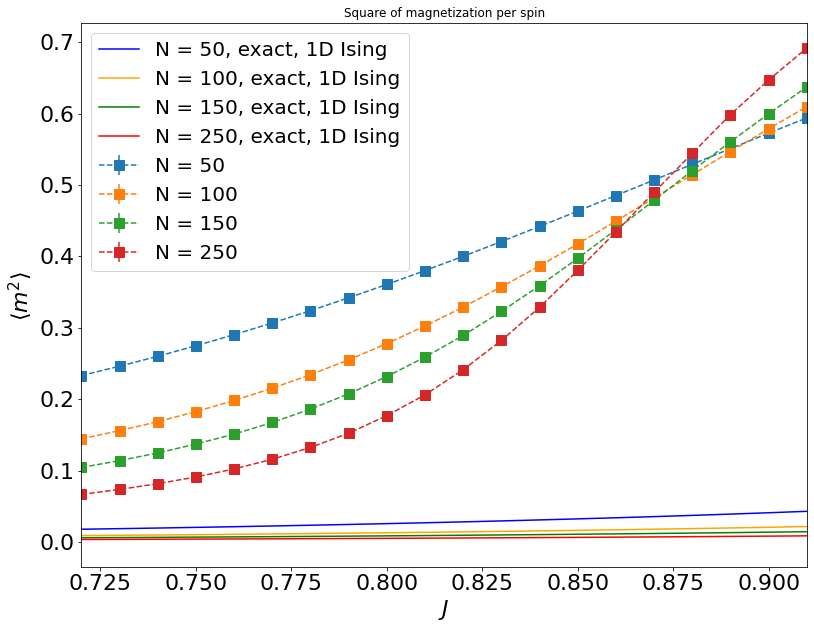

In [34]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
print(lengths)
Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)

lengths = [50, 100,150,250]
for l in lengths:
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l =  data_l[:,1] 
    
    m2 = data_l[:,15] 
 
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,10]

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l , y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(np.min(J_l), np.max(J_l) )

filename = "Ising/SrNam2-50.txt"
filedata = np.loadtxt(filename)
l=0  
plt.plot(filedata[:,0], filedata[:,1]/50/50  , c="blue",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
     
    
filename = "Ising/SrNam2-100.txt"
filedata = np.loadtxt(filename)
l=1 
plt.plot(filedata[:,0], filedata[:,1]/100/100  , c="orange",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
   
filename = "Ising/SrNam2-150.txt"
filedata = np.loadtxt(filename)
l=2
plt.plot(filedata[:,0], filedata[:,1]/150/150  , c="green",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
  

filename = "Ising/SrNam2-250.txt"
filedata = np.loadtxt(filename)
l=3
plt.plot(filedata[:,0], filedata[:,1]/250/250  , c="red",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
   
plt.title("Square of magnetization per spin")
#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 

[  10.   50.  100.  150.  250.  300.  350.  500.  600.  750. 1000.]
-0.026923076923076925


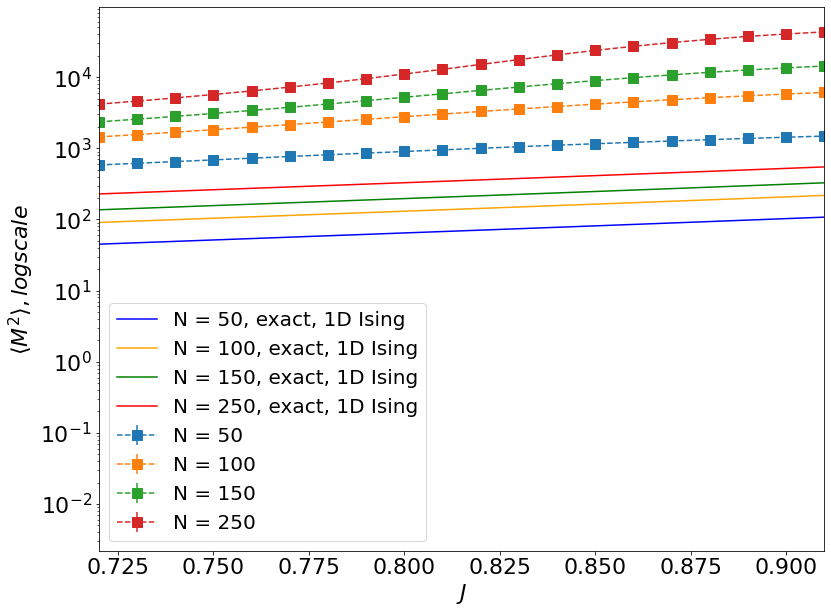

In [35]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
print(lengths)
Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)

lengths = [50, 100,150,250]
for l in lengths:
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l =  data_l[:,1] 
    
    m2 = data_l[:,15] 
 
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*l*l
    
    
    errs = data_l[:,10]

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l , y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle M^2 \rangle, logscale $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(np.min(J_l), np.max(J_l) )

filename = "Ising/SrNam2-50.txt"
filedata = np.loadtxt(filename)
l=0  
plt.plot(filedata[:,0], filedata[:,1]  , c="blue",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
     
    
filename = "Ising/SrNam2-100.txt"
filedata = np.loadtxt(filename)
l=1 
plt.plot(filedata[:,0], filedata[:,1]  , c="orange",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
   
filename = "Ising/SrNam2-150.txt"
filedata = np.loadtxt(filename)
l=2
plt.plot(filedata[:,0], filedata[:,1]  , c="green",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
  

filename = "Ising/SrNam2-250.txt"
filedata = np.loadtxt(filename)
l=3
plt.plot(filedata[:,0], filedata[:,1]  , c="red",  ms = 10, label = "N = " + str(lengths[l]) + ", exact, 1D Ising"   )
      
   

#plt.axvline(x=0, c="k" )
plt.yscale('log')
plt.legend(loc="best", fontsize=20)

# Add h

No handles with labels found to put in legend.


7 7
(7, 7)


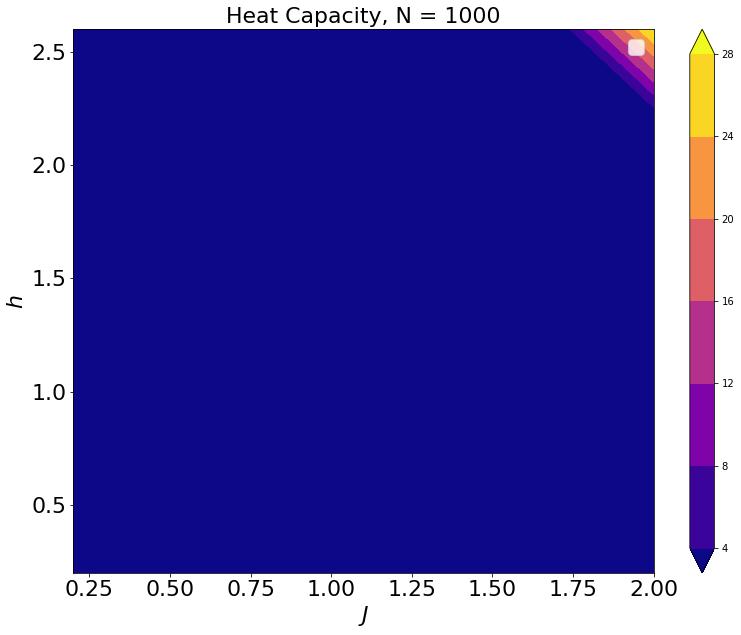

In [36]:
data_np = np.loadtxt("Ising/Add_field/longnear.txt")
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l = 1000

data_l = data_np[data_np[:,0]==l]
J_l = np.unique(data_l[:, 1])
h_l = np.unique(data_l[:, 2])
 
data_draw = np.zeros((len(J_l), len(h_l)))

#for i in range(len(J_l)):
    #for j in range(len(h_l)):
        #data_draw[i,j] = data_l
    
    
J_l = data_l[:, 1] 
heat = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
 
J_l = np.unique(data_l[:, 1])
h_l = np.unique(data_l[:, 2])


heat =  heat.reshape(len(J_l), len(heat)//len(J_l))
errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]


 
print(len(J_l), len(h_l))
print(heat.shape )

 
plt.contourf(J_l, h_l, heat.T,extend='both', cmap = "plasma")
    
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ h  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)
plt.title("Heat Capacity, N = 1000", fontsize=22)
#plt.axvline(x=0, c="k" )
plt.colorbar()
plt.legend(loc="best", fontsize=20)


No handles with labels found to put in legend.


7 7
(7, 7)


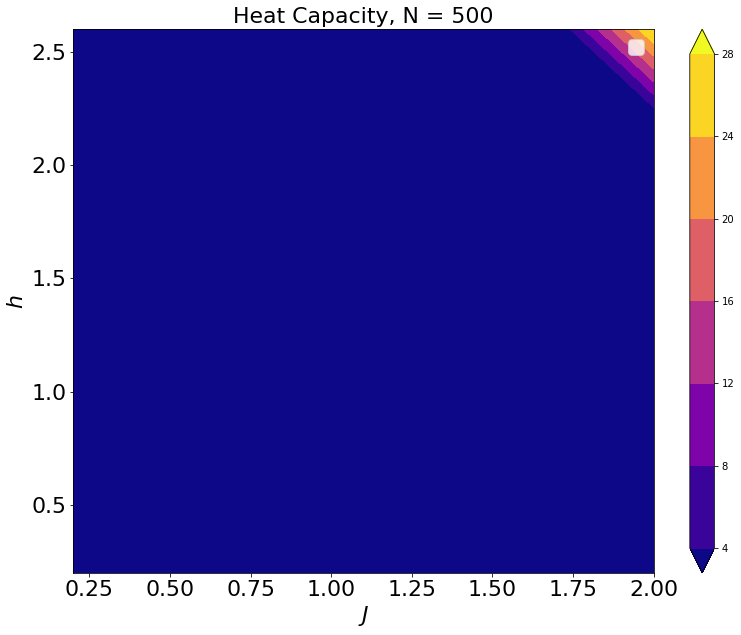

In [37]:
data_np = np.loadtxt("Ising/Add_field/longnear.txt")
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l = 1000

data_l = data_np[data_np[:,0]==l]
J_l = np.unique(data_l[:, 1])
h_l = np.unique(data_l[:, 2])
 
data_draw = np.zeros((len(J_l), len(h_l)))

#for i in range(len(J_l)):
    #for j in range(len(h_l)):
        #data_draw[i,j] = data_l
    
    
J_l = data_l[:, 1] 
heat = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
 
J_l = np.unique(data_l[:, 1])
h_l = np.unique(data_l[:, 2])


heat =  heat.reshape(len(J_l), len(heat)//len(J_l))
errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]


 
print(len(J_l), len(h_l))
print(heat.shape )

 
plt.contourf(J_l, h_l, heat.T,extend='both', cmap = "plasma")
    
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ h  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)
plt.title("Heat Capacity, N = 500", fontsize=22)
#plt.axvline(x=0, c="k" )
plt.colorbar()
plt.legend(loc="best", fontsize=20)

No handles with labels found to put in legend.


7 7
(7, 7)


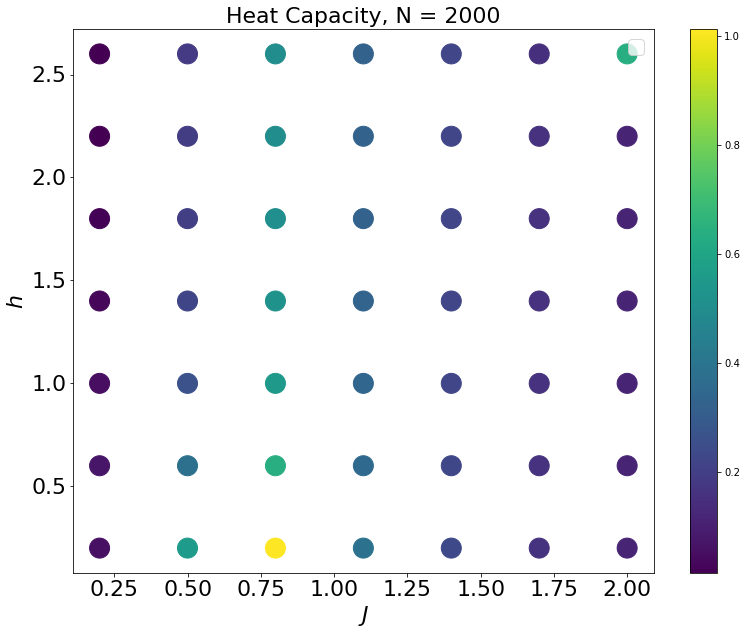

In [38]:
data_np = np.loadtxt("Ising/Add_field/longnear.txt")
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l = 2000

l = 500
data_l = data_np[data_np[:,0]==l]
J_l = np.unique(data_l[:, 1])
h_l = np.unique(data_l[:, 2])
 
data_draw = np.zeros((len(J_l), len(h_l)))

#for i in range(len(J_l)):
    #for j in range(len(h_l)):
        #data_draw[i,j] = data_l
    
    
J_l = data_l[:, 1] 
heat = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
 
J_l = np.unique(data_l[:, 1])
h_l = np.unique(data_l[:, 2])


heat =  heat.reshape(len(J_l), len(heat)//len(J_l))
errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]


 
print(len(J_l), len(h_l))
print(heat.shape )
 
J_l = data_l[:, 1]
h_l = data_l[:, 2]
#plt.contourf(J_l, h_l, heat.T,extend='both', cmap = "plasma")
plt.scatter(J_l, h_l, c = heat, s = 400 )
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ h  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)
plt.title("Heat Capacity, N = 2000", fontsize=22)
#plt.axvline(x=0, c="k" )
plt.colorbar()
plt.legend(loc="best", fontsize=20)

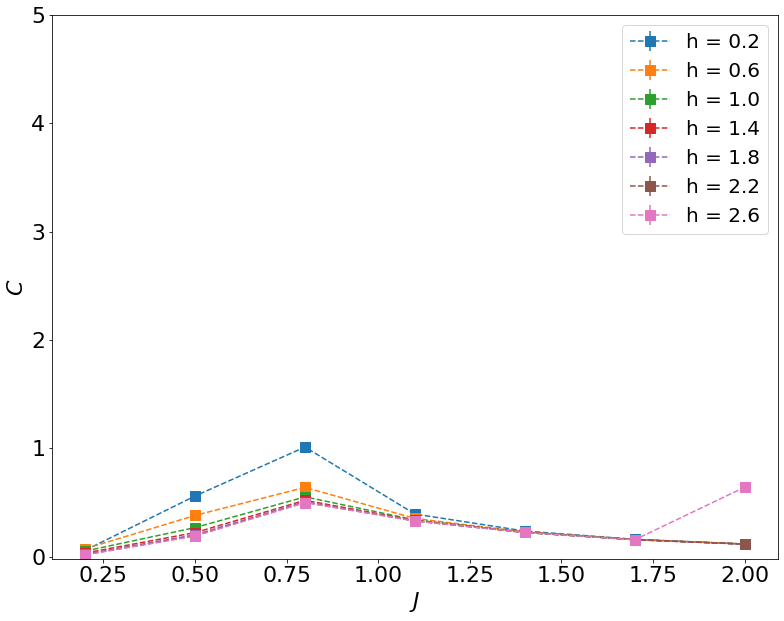

In [39]:
data_np = np.loadtxt("Ising/Add_field/longnear.txt", skiprows=1)
hs = np.unique(data_np[:, 2])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l = 500
for h in hs:
    data_l = data_np[data_np[:,0]==l]
    data_l = data_l[data_l[:,2]==h]
    J_l = data_l[:, 1]  
    heat = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
    #heat =  heat.reshape(len(J_l), len(heat)//len(J_l))
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]



    plt.errorbar(J_l, heat, yerr=errs, fmt="s--", ms = 10, label = "h = " + str(h))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 5)



plt.legend(loc="best", fontsize=20) 

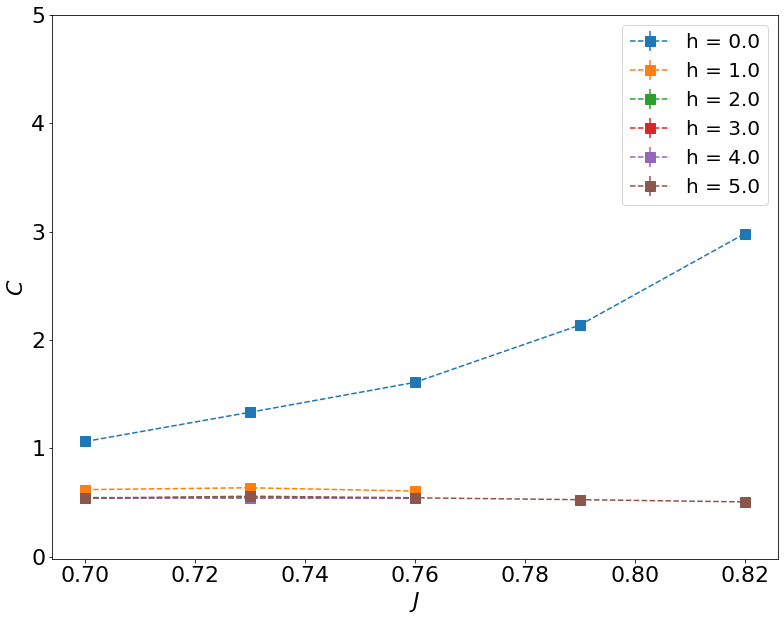

In [40]:
data_np = np.loadtxt("Ising/Add_field_far/longnear.txt", skiprows=1)
hs = np.unique(data_np[:, 2])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l = 750
for h in hs:
    data_l = data_np[data_np[:,0]==l]
    data_l = data_l[data_l[:,2]==h]
    J_l = data_l[:, 1]  
    heat = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
    #heat =  heat.reshape(len(J_l), len(heat)//len(J_l))
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]



    plt.errorbar(J_l, heat, yerr=errs, fmt="s--", ms = 10, label = "h = " + str(h))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 5)



plt.legend(loc="best", fontsize=20) 

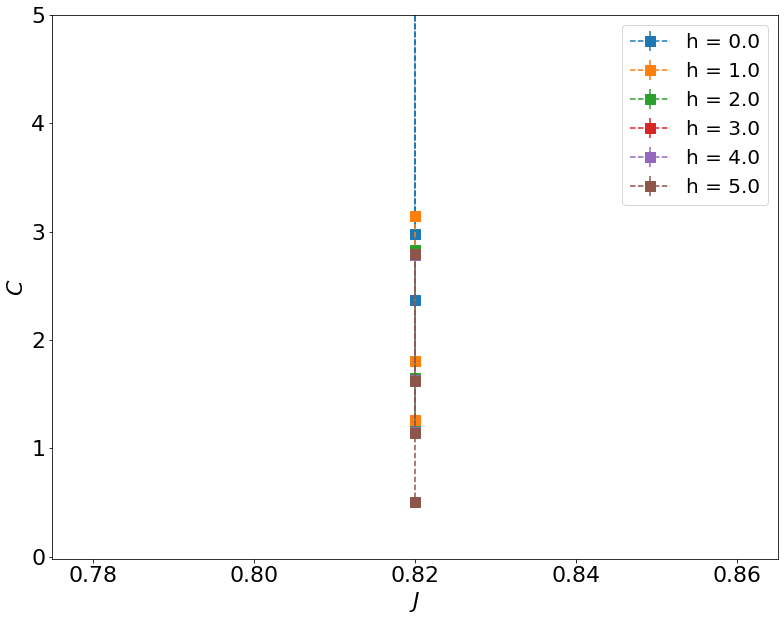

In [41]:
data_np = np.loadtxt("Ising/Add_field_far/longnear.txt", skiprows=1)
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

hs = np.unique(data_np[:, 2])
ls = np.unique(data_np[:, 0])
js = np.unique(data_np[:, 1])
for h in hs:
    for j in js:
        
        data_l = data_np[data_np[:,1]==j]
        data_l = data_l[data_l[:,2]==h]
    
    J_l = data_l[:, 1]  
    heat = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
    #heat =  heat.reshape(len(J_l), len(heat)//len(J_l))
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]



    plt.errorbar(J_l, heat, yerr=errs, fmt="s--", ms = 10, label = "h = " + str(h))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 5)



plt.legend(loc="best", fontsize=20) 

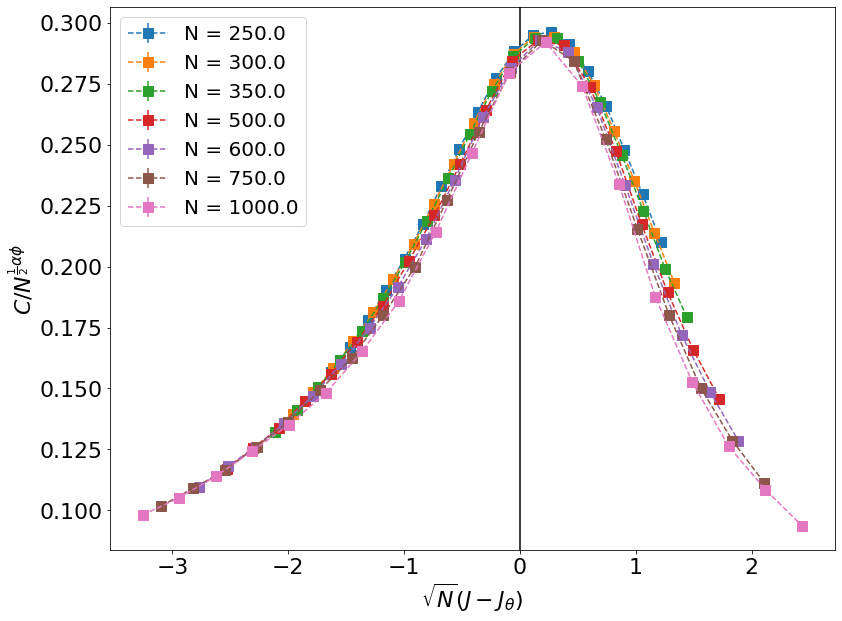

In [81]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.833
 
Tc = 0.833

 
nu=1

 
alpha = -1/3 
fc = 3/7
power = alpha*fc
 

power = -3/4

 

for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*l#*J_l*J_l
    
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*np.power(L, power)
    
    
    #errs = data_l[:,16]*y
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    errs = errs*np.power(L, power)

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(x*np.power(L, 1/nu), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.ylabel(r"$ C / N ^{\frac{1}{2} \alpha \phi}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 
    

#plt.savefig("/home/kamilla/Lattice_models/img/canonical_cscaled.png")


In [53]:
def peak_heat(n, alphafc, a):
    return a*np.power(n, alphafc)
    #return a+b*np.log(n)

In [54]:
data_83

array([[ 1.00000e+03,  8.30000e-01,  0.00000e+00,  4.88621e+03,
         1.58305e+01,  1.04174e+04,  7.29445e+02,  1.39779e+00,
         3.43001e-04,  1.95923e+00,  9.66343e-04,  3.88113e+00,
         3.87017e-03, -1.37695e-03,  3.81676e-03,  1.87099e-01,
         1.18981e-03,  7.55848e-02,  7.06124e-04,  3.36000e+11],
       [ 2.50000e+02,  8.30000e-01,  0.00000e+00,  9.20943e+02,
         5.76379e-01,  1.25326e+03,  1.01509e+01,  1.32178e+00,
         9.86247e-05,  1.76038e+00,  2.61709e-04,  3.19223e+00,
         9.43853e-04, -1.36606e-04,  1.16761e-03,  2.82312e-01,
         2.53937e-04,  1.51321e-01,  1.99301e-04,  4.02500e+11],
       [ 3.00000e+02,  8.30000e-01,  0.00000e+00,  1.14742e+03,
         8.28842e-01,  1.65406e+03,  1.66099e+01,  1.33441e+00,
         1.27401e-04,  1.79246e+00,  3.38745e-04,  3.29753e+00,
         1.22339e-03,  7.04053e-04,  1.12780e-03,  2.69271e-01,
         3.18772e-04,  1.39739e-01,  2.56447e-04,  3.98100e+11],
       [ 3.50000e+02,  8.30000e-01,  

In [69]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])

J = 0.83 


data_83 = data_np[data_np[:,1]==J]


data_83 = data_83[data_83[:,0]>200]


ns = data_83[:, 0]
   
heat_data = (data_83[:,9] - data_83[:,7]*data_83[:,7])*l#*J_l*J_l
 
    
errs =  data_83[:,10]*data_83[:,10] + 4*data_83[:,8]*data_83[:,8]*data_83[:,7]*data_83[:,7]
errs = np.sqrt(errs)


popt, pcov = curve_fit(peak_heat, ns, heat_data, sigma=errs, absolute_sigma=False )  

perr = np.sqrt(np.diag(pcov))

popt

array([ -0.64805851, 475.64738357])

In [70]:
heat_data

array([ 5.4131159, 13.2776316, 11.8099519, 10.6845431,  8.4973856,
        7.5048064,  6.4880991])

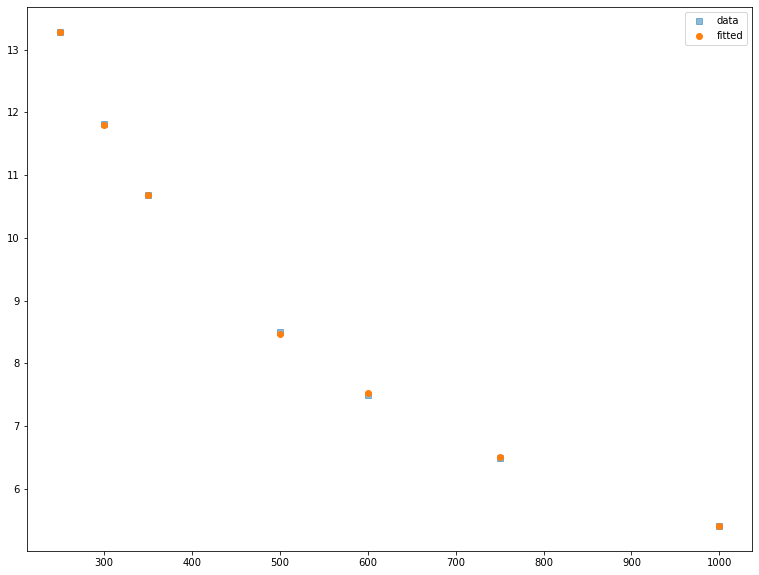

In [71]:
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


plt.plot(ns, heat_data, "s", alpha = 0.5, label = "data")


plt.plot(ns, peak_heat(ns, popt[0], popt[1] ), "o", label = "fitted")


plt.legend()

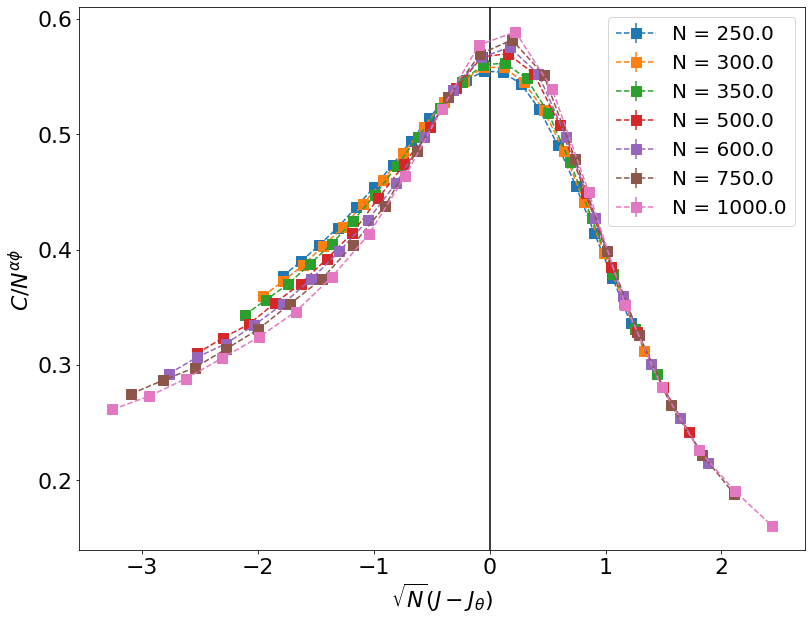

In [83]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.833
 
Tc = 0.833

 
nu=1

 
alpha = -1/3 
fc = 3/7
power = alpha*fc
 

power = popt[0]
 
nu = 2
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*l#*J_l*J_l
    
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*np.power(L, power)
    
    
    #errs = data_l[:,16]*y
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    errs = np.sqrt(errs)*np.power(L, power)

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(x*np.power(l, 1/nu), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.ylabel(r"$ C / N ^{  \alpha \phi}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 
    

#plt.savefig("/home/kamilla/Lattice_models/img/canonical_cscaled.png")

In [66]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])

J = 0.833


data_83 = data_np[data_np[:,1]==J]


data_83 = data_83[data_83[:,0]>200]


ns = data_83[:, 0]
   
heat_data = (data_83[:,9] - data_83[:,7]*data_83[:,7])*l*J*J
 
    
errs =  data_83[:,10]*data_83[:,10] + 4*data_83[:,8]*data_83[:,8]*data_83[:,7]*data_83[:,7]
errs = np.sqrt(errs)


popt, pcov = curve_fit(peak_heat, ns, heat_data, sigma=errs, absolute_sigma=False )  

perr = np.sqrt(np.diag(pcov))

popt

array([ -0.5760158 , 197.12663402])

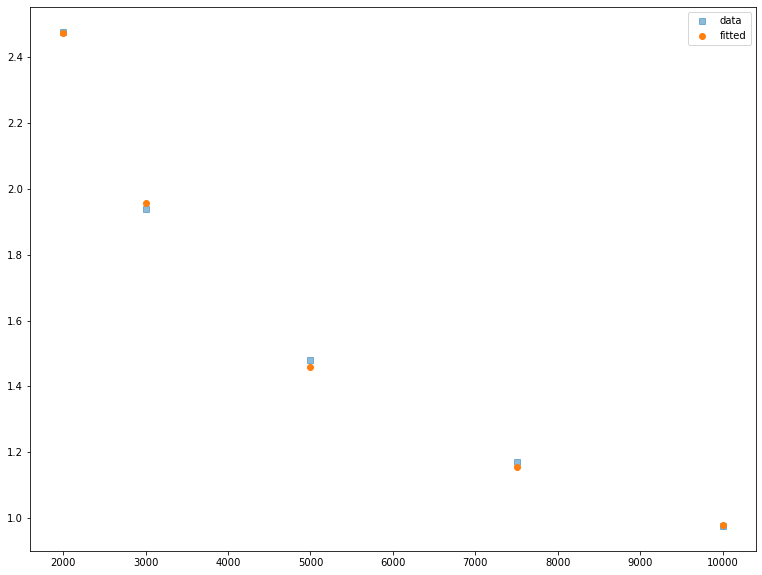

In [67]:
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


plt.plot(ns, heat_data, "s", alpha = 0.5, label = "data")


plt.plot(ns, peak_heat(ns, popt[0], popt[1] ), "o", label = "fitted")


plt.legend()